## Ejercicios de la guía n°3 (800_Ejercicio_3)

Resolver el ejercicio n°2 en Python.  
La entrada y la respuesta al impulso de un sistema continuo, lineal e invariante en el tiempo (LTI) están dadas por las siguientes expresiones:

$$  x(t) = u(t); h(t) = e^{-\alpha t}u(t), \alpha > 0 $$

Obtenga la salida y(t)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t_final = 10
fs = 100
t = np.arange(0,t_final,1/fs)  # Array tiempo entre 0 seg y 10 seg a una fs de 100 mustras/segundo

xt = np.heaviside(t, 1)

alfa = 3
ht = np.exp(-1*alfa*t)*xt  # Función exponencial multiplicada por escalon unitario  

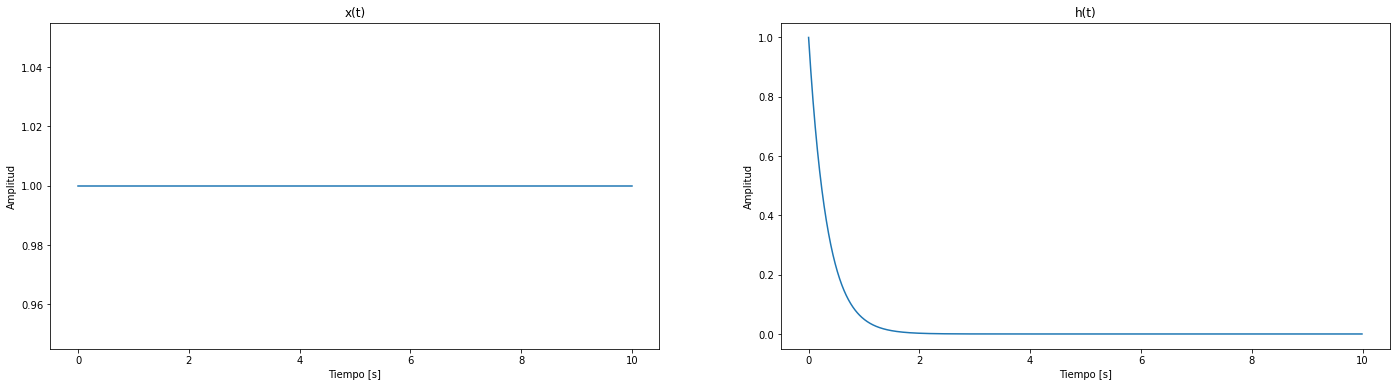

In [5]:
#Ploteo
fig, ax = plt.subplots(1, 2, frameon=False, figsize=(24, 6))

ax[0].plot(t, xt)
ax[0].set_title('x(t)')

ax[1].plot(t, ht)
ax[1].set_title('h(t)')

for i in range(0, 2):
    ax[i].set_ylabel('Amplitud')
    ax[i].set_xlabel('Tiempo [s]')


#### Cálculo analítico
$$ y(t) = \int^{\infty}_{-\infty} x(\tau) ~ h(t-\tau) ~ d\tau $$
$$ y(t) = \int^{\infty}_{-\infty} e^{-\alpha \tau} u(\tau) ~ u(t-\tau) ~ d\tau = \int^{t}_{0} e^{-\alpha \tau} ~ d\tau $$ 

In [22]:
import sympy as sym

tau = sym.symbols('tau')
alpha = sym.symbols('alpha')

y =  sym.integrate(sym.exp(-1*alpha*tau),(tau, 0, 't'))

y

Piecewise((1/alpha - exp(-alpha*t)/alpha, (alpha > -oo) & (alpha < oo) & Ne(alpha, 0)), (t, True))

Se observa como la convolución calculada analíticamente da como resultado

$$  y(t)  =  [\frac{1}{\alpha} -  \frac{e^{-t\alpha}}{{\alpha}}]~u(t) = \frac{1-e^{-t\alpha}}{\alpha}~u(t) $$

In [23]:
yt = np.convolve(xt,ht) 

analitica = ((1-np.exp(-1*alfa*t))/alfa)*np.heaviside(t,1) 
 
yt_reducida = np.convolve(xt,ht)/fs

La función calcualda con la función de Numpy se ve multiplicada por el valor de la frecuencia de mustreo debido a que es realizada de forma discreta, por lo que para ser comparada con la resuelta analíticamente debe escalarse.

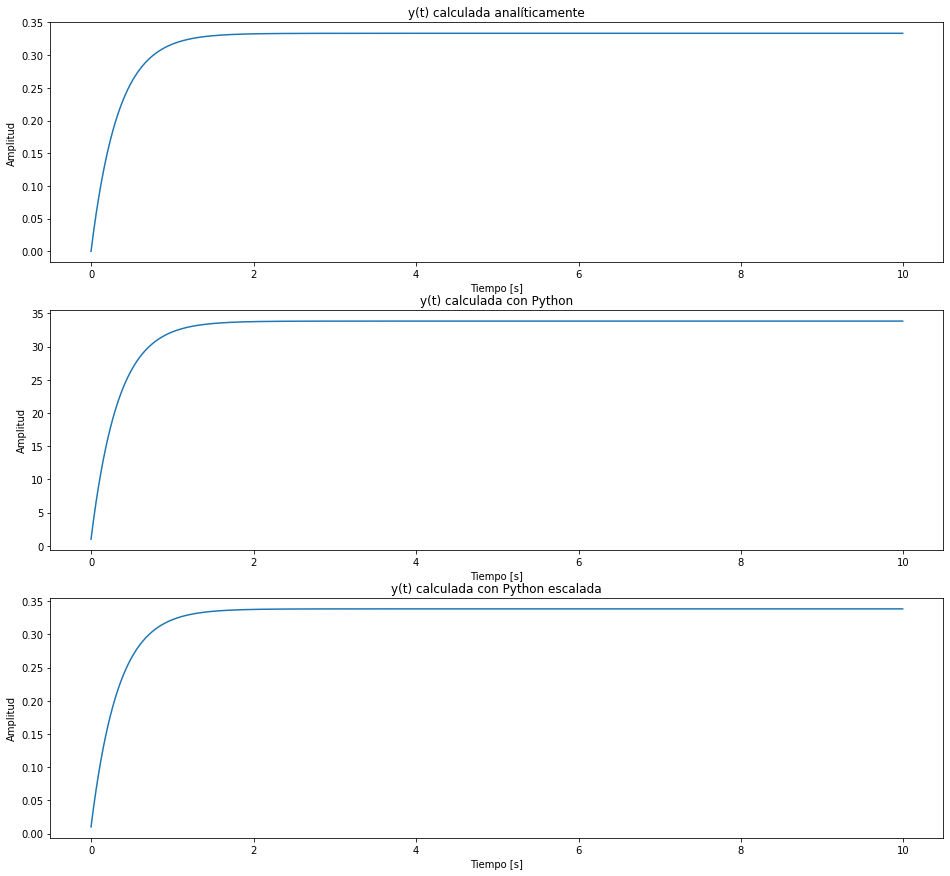

In [24]:
#Ploteo
fig, ax = plt.subplots(3, frameon=False, figsize=(16, 15))

ax[0].plot(t, analitica)
ax[0].set_title('y(t) calculada analíticamente')

ax[1].plot(t, yt[0:len(t)])
ax[1].set_title('y(t) calculada con Python')

ax[2].plot(t, yt_reducida[0:len(t)])
ax[2].set_title('y(t) calculada con Python escalada')

for i in range(0, 3):
    ax[i].set_ylabel('Amplitud')
    ax[i].set_xlabel('Tiempo [s]')

